In [8]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

Read and have a look at the data.

In [11]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Major_category                    Engineering
Total                                    2339
Sample_size                                36
Men                                      2057
Women                                     282
ShareWomen                           0.120564
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

Clean the data by dropping rows wiht missing data.

In [15]:
raw_data_count = recent_grads.count()
print(raw_data_count)

Rank                    173
Major_code              173
Major                   173
Major_category          173
Total                   173
Sample_size             173
Men                     173
Women                   173
ShareWomen              173
Employed                173
Full_time               173
Part_time               173
Full_time_year_round    173
Unemployed              173
Unemployment_rate       172
Median                  173
P25th                   173
P75th                   173
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           173
dtype: int64


In [25]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.count()
print(cleaned_data_count)


Rank                    172
Major_code              172
Major                   172
Major_category          172
Total                   172
Sample_size             172
Men                     172
Women                   172
ShareWomen              172
Employed                172
Full_time               172
Part_time               172
Full_time_year_round    172
Unemployed              172
Unemployment_rate       172
Median                  172
P25th                   172
P75th                   172
College_jobs            172
Non_college_jobs        172
Low_wage_jobs           172
dtype: int64


## Scatter Plots

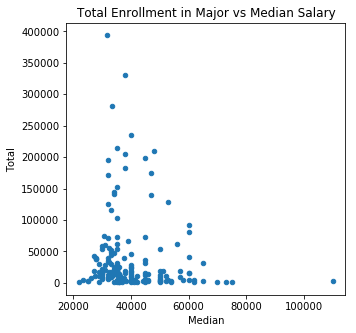

In [146]:
recent_grads.plot(x='Median', y='Total', kind='scatter', title='Total Enrollment in Major vs Median Salary', figsize=(5,5))

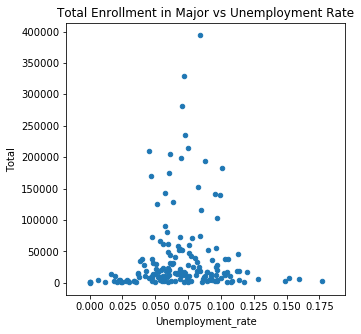

In [48]:
recent_grads.plot(x='Unemployment_rate', y='Total', kind='scatter', title='Total Enrollment in Major vs Unemployment Rate', figsize=(5,5))

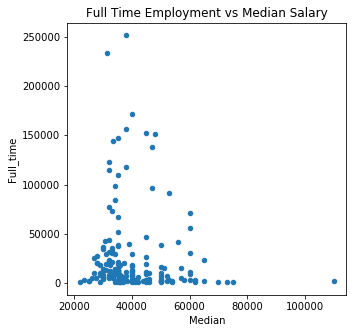

In [34]:
recent_grads.plot(x='Median', y='Full_time', kind='scatter', title='Full Time Employment vs Median Salary', figsize=(5,5))

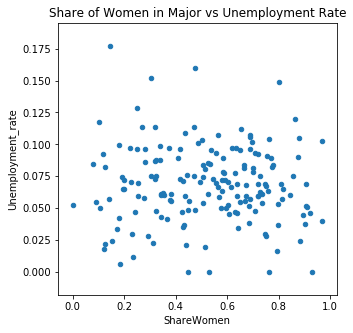

In [36]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share of Women in Major vs Unemployment Rate', figsize=(5,5))

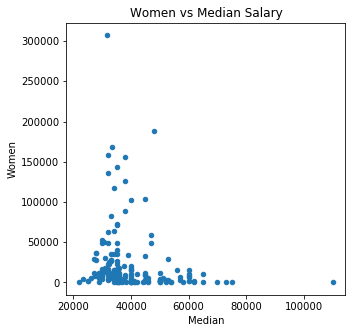

In [38]:
recent_grads.plot(x='Median', y='Women', kind='scatter', title='Median Salary Amongst Women', figsize=(5,5))

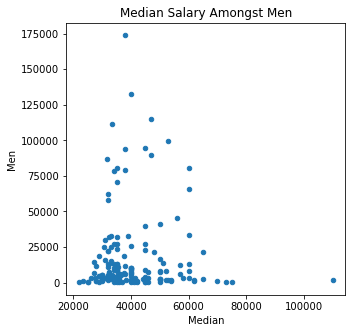

In [39]:
recent_grads.plot(x='Median', y='Men', kind='scatter', title='Median Salary Amongst Men', figsize=(5,5))

From the exploratory scatter plots above, we can see that:
- graduates from the most popular majors earn around \$40k/year
- graduates from the most popular majors have an unemplyment rate between 5 and 10%. 
- there doesn't seem to be any correlation between the share of women in a major and the unemployment rate of graduates of that major
- there seems to be a wider spread of salaries amongst male graduates compared to female graduates
- there is an outlying major with very low enrollment that has graduates making a median salary >$100K! Let's figure out which major this is.

In [75]:
recent_grads.loc[recent_grads['Median'] > 100000]

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


It's Petroleum Engineering! Only 2339 students graduated with this degree, but their median salary is \$110K!

## Histograms

Below, histograms are used to explore the distribution of various atrributes of each major.

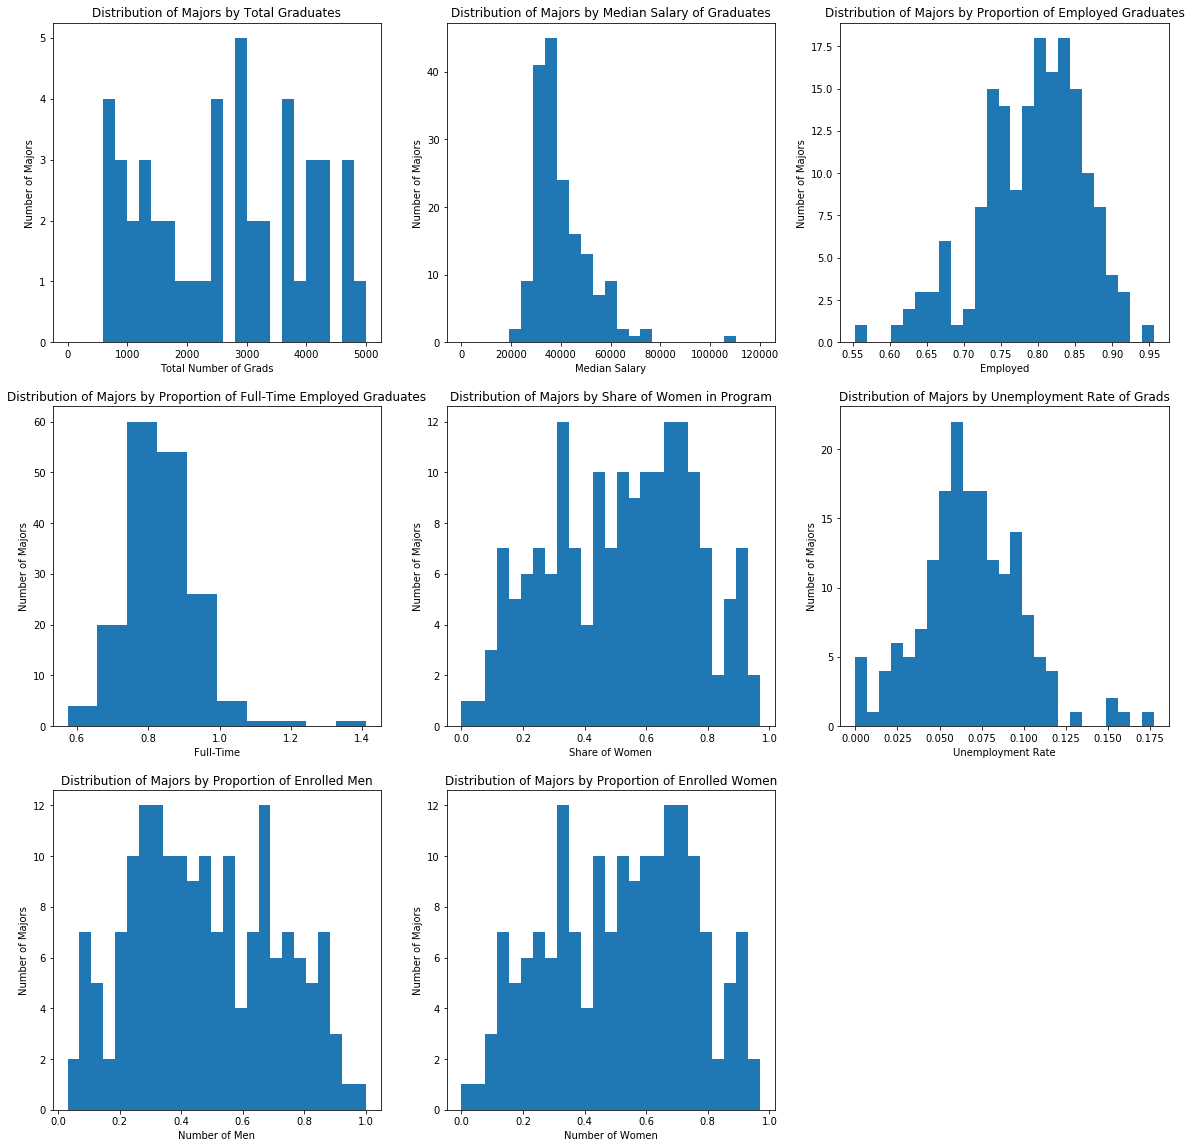

In [119]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)

ax1.hist(recent_grads['Total'], bins=25,range=(0,5000))
ax1.set_title('Distribution of Majors by Total Graduates')
ax1.set_xlabel('Total Number of Grads')
ax1.set_ylabel('Number of Majors')

ax2.hist(recent_grads['Median'], bins=25,range=(0,120000))
ax2.set_title('Distribution of Majors by Median Salary of Graduates')
ax2.set_xlabel('Median Salary')
ax2.set_ylabel('Number of Majors')

ax3.hist(recent_grads['Employed']/recent_grads['Total'], bins=25)
ax3.set_title('Distribution of Majors by Proportion of Employed Graduates')
ax3.set_xlabel('Employed')
ax3.set_ylabel('Number of Majors')

ax4.hist(recent_grads['Full_time']/recent_grads['Employed'])
ax4.set_title('Distribution of Majors by Proportion of Full-Time Employed Graduates')
ax4.set_xlabel('Full-Time')
ax4.set_ylabel('Number of Majors')

ax5.hist(recent_grads['ShareWomen'], bins=25)
ax5.set_title('Distribution of Majors by Share of Women in Program')
ax5.set_xlabel('Share of Women')
ax5.set_ylabel('Number of Majors')

ax6.hist(recent_grads['Unemployment_rate'], bins=25)
ax6.set_title('Distribution of Majors by Unemployment Rate of Grads')
ax6.set_xlabel('Unemployment Rate')
ax6.set_ylabel('Number of Majors')

total_men_women = recent_grads['Men']+recent_grads['Women']

ax7.hist(recent_grads['Men']/total_men_women, bins=25)
ax7.set_title('Distribution of Majors by Proportion of Enrolled Men')
ax7.set_xlabel('Number of Men')
ax7.set_ylabel('Number of Majors')

ax8.hist(recent_grads['Women']/total_men_women, bins=25)
ax8.set_title('Distribution of Majors by Proportion of Enrolled Women')
ax8.set_xlabel('Number of Women')
ax8.set_ylabel('Number of Majors')

plt.show()

From the above analysis, we can see that:
- a majority of majors have graduates earning a median salary just below \$40K
- the proportion of employed graduates is skewed left-skewed (a good sign for graduates!)
- there seems to be inconsistencies in the data as the proportion of full time graduates (of all employed graduates) exceeds 1
- there is a slight left skew in the distribution of majors by share of women; this is confirmed by the final two histograms
- The unemployment rate for majors appears to have a mostly normal distribution with the exception of some outliers

## Scatter Matrix Plots

Just for fun...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD71978F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DD71A65C18>]], dtype=object)

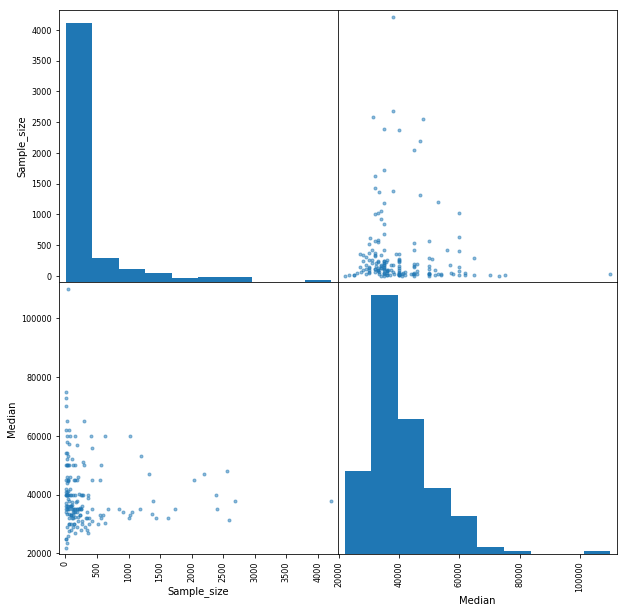

In [153]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD71A90A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DD6EDA80F0>]], dtype=object)

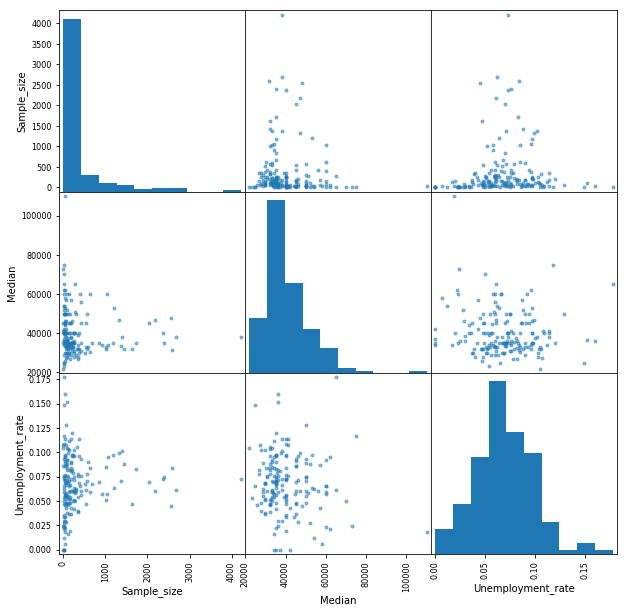

In [154]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

# Bar Plots

Let's have a look at how share of women varies by the majors wtih the 5 highest and 5 lowest earning grads.

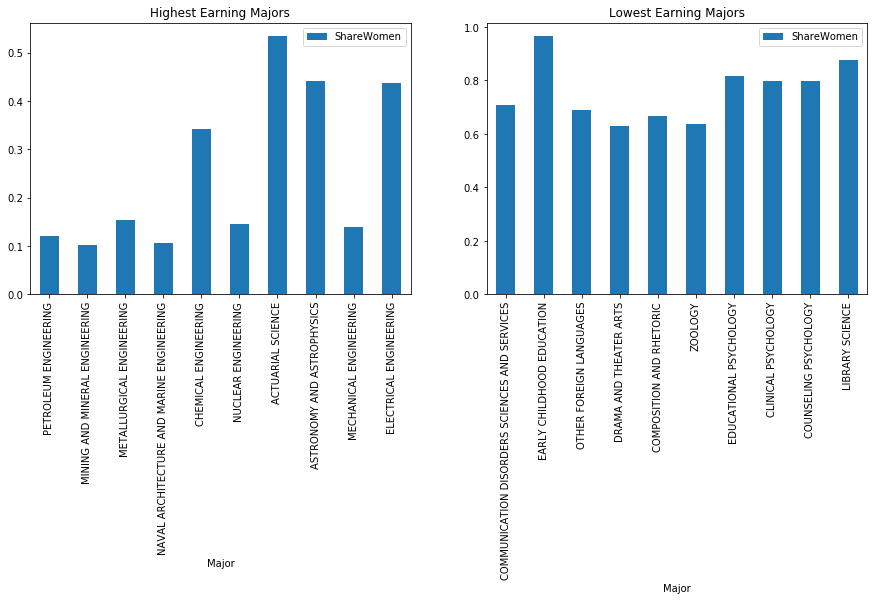

In [178]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

recent_grads[:10].plot.bar(x='Major', y='ShareWomen', title='Highest Earning Majors', ax=ax[0])
recent_grads[162:].plot.bar(x='Major', y='ShareWomen', title='Lowest Earning Majors', ax=ax[1])

Do the same for unemployment rates.

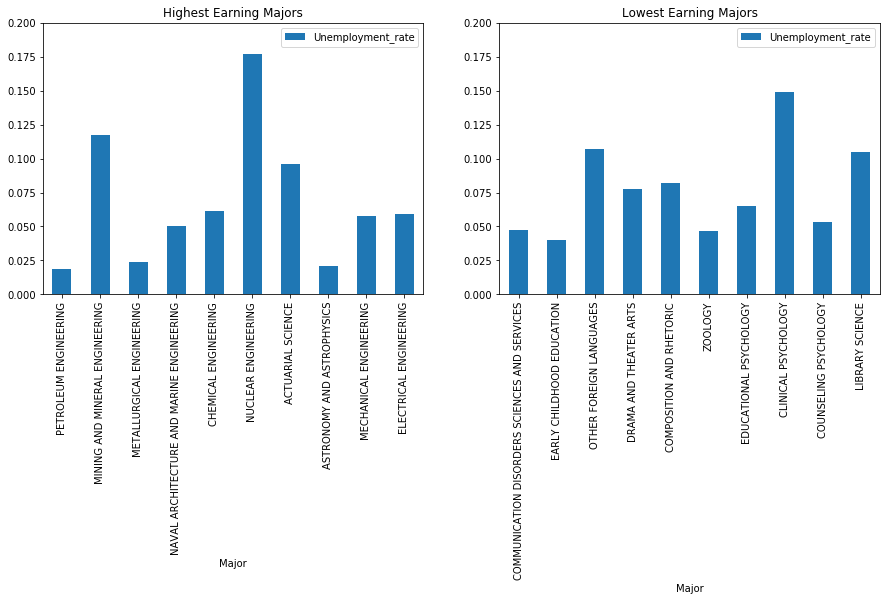

In [182]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
()
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', title='Highest Earning Majors', ylim=(0,0.2), ax=ax[0])
recent_grads[162:].plot.bar(x='Major', y='Unemployment_rate', title='Lowest Earning Majors', ylim=(0,0.2), ax=ax[1])

It looks like the share of women is well below half for most of the top 10 earning majors with the exception of Actuarial Science. On the other hand, the share of women is consistently above half for the bottom 10 majors.

With respect to unemployment rates, there doesn't seem to be a big difference between the top 10 and bottom 10 majors. We'll need to do some statistical anaylsis to assess this. 



## Next Steps
- grouped bar plot to compare the number of men and women in each category of majors
- box plot to explore the distribution of median salaries and unemployment rate
- hexagonal bin plot to to visualize the columns that had dense scatter plots from earlier
- statistical analysis of earlier comparisons
